In [130]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
%matplotlib inline

* Load and display the data set .

In [131]:
df = pd.read_csv('BikeSharingAssignment.csv')

In [132]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


* Check for missing values and duplicates --> as it appears there is no null values or duplicates .

In [133]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [134]:
df.duplicated().sum()

np.int64(0)

* Feature Engineering : I have derived 5 features from the datetime column from the dataset .

In [135]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df['dayofweek'] = df['datetime'].dt.dayofweek

In [136]:
df['season'] =df.season.astype('category')
df['holiday'] =df.holiday.astype('category')
df['workingday'] =df.workingday.astype('category')
df['weather'] =df.weather.astype('category')
df['dayofweek'] =df.dayofweek.astype('category')
df['month'] =df.month.astype('category')
df['year'] =df.year.astype('category')
df['hour'] =df.hour.astype('category')
df['day'] =df.day.astype('category')



In [137]:
df.describe()

,datetime,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,20.23086,23.655084,61.886460,12.853031,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,13.94000,16.665000,47.000000,7.201500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,7.79159,8.474601,19.245033,8.134515,49.960477,151.039033,181.144454


* Encode Categorical Variables: I used one hot encoding technique to convert categorical features to numerical features . 

In [138]:
def one_hot_encoding(df):
    for col in ['hour', 'day', 'month', 'year', 'dayofweek', 'season', 'weather']:
        unique_values = sorted(df[col].unique())  
        for value in unique_values:
            df[f"{col}_{value}"] = (df[col] == value).astype(int)
    

    return df



In [139]:
df = one_hot_encoding(df)


* Exploratory Data Analysis (EDA):
1. Analyze the Target Variable

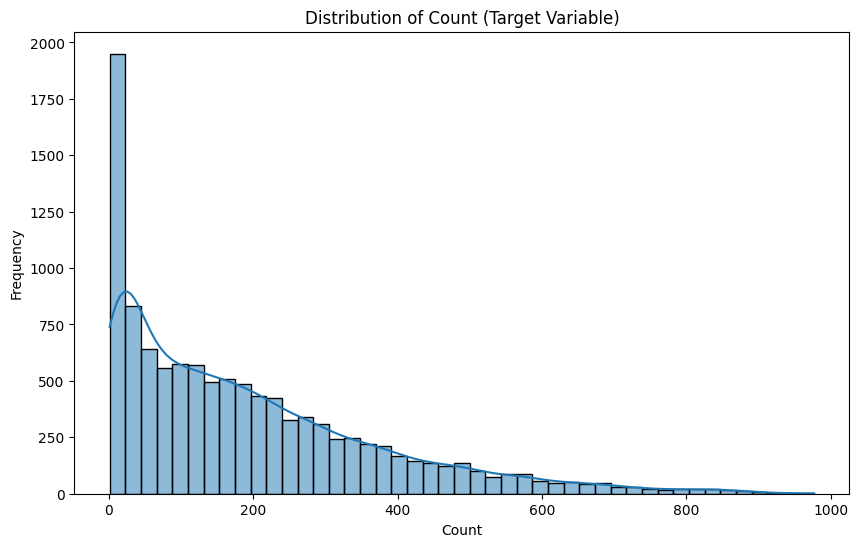

In [140]:
plt.figure(figsize=(10,6))
sns.histplot(df['count'], kde=True)
plt.title('Distribution of Count (Target Variable)')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

* We do a logarithmic transformation for the target variable .

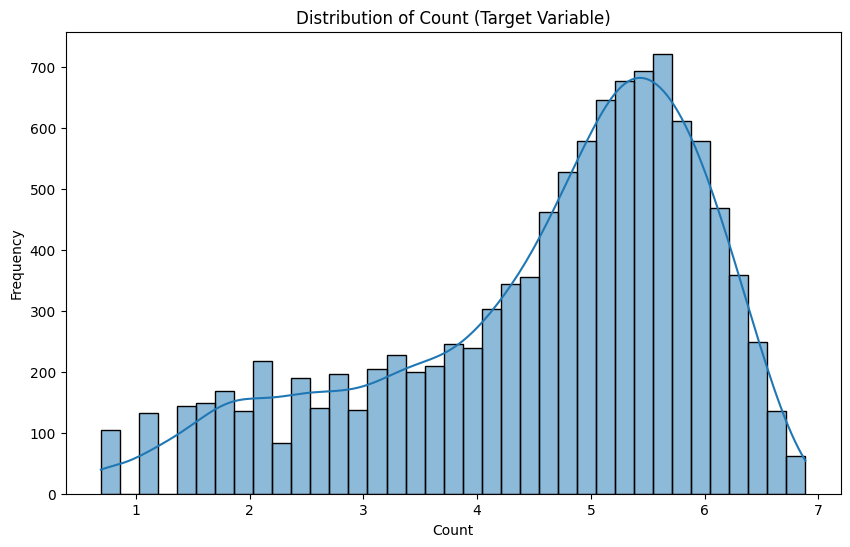

In [141]:
np_log = np.log1p(df['count'])
plt.figure(figsize=(10,6))
sns.histplot(np_log, kde=True)
plt.title('Distribution of Count (Target Variable)')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

* Analyze Relationships (Categorical Features --> Bar plot )

/var/folders/q8/m_0pc5fs2b14x2jrrp5dwh500000gn/T/ipykernel_956/3874540687.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='count', data=df, palette='pastel')


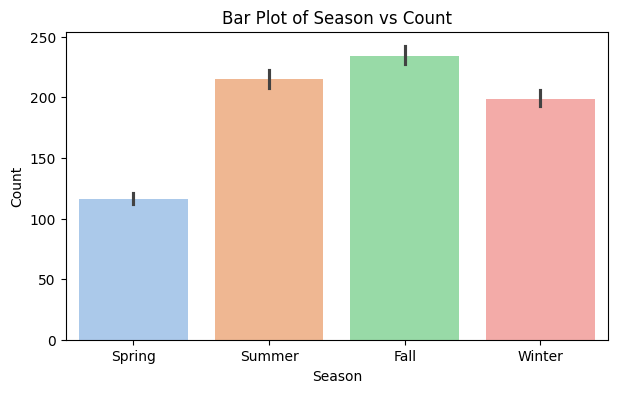

/var/folders/q8/m_0pc5fs2b14x2jrrp5dwh500000gn/T/ipykernel_956/3874540687.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weather', y='count', data=df, palette='coolwarm')


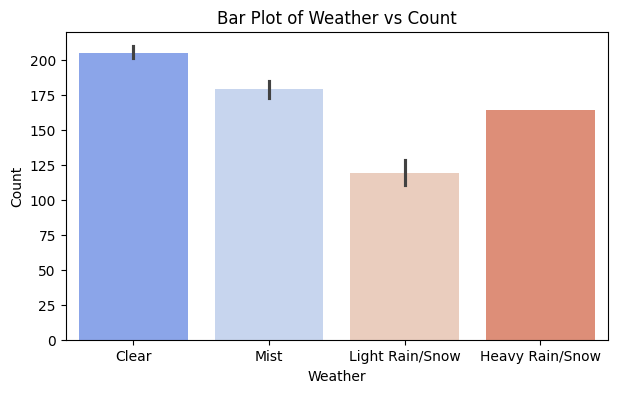

/var/folders/q8/m_0pc5fs2b14x2jrrp5dwh500000gn/T/ipykernel_956/3874540687.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='holiday', y='count', data=df, palette='coolwarm')


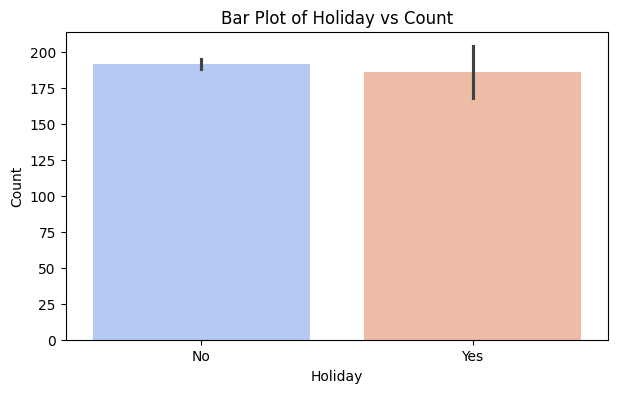

/var/folders/q8/m_0pc5fs2b14x2jrrp5dwh500000gn/T/ipykernel_956/3874540687.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workingday', y='count', data=df, palette='coolwarm')


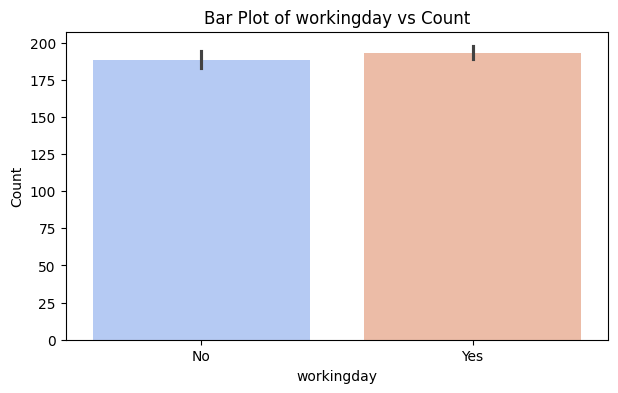

/var/folders/q8/m_0pc5fs2b14x2jrrp5dwh500000gn/T/ipykernel_956/3874540687.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='count', data=df, palette='coolwarm')


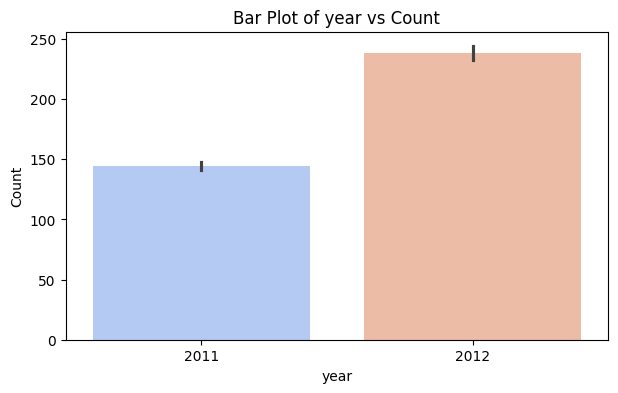

/var/folders/q8/m_0pc5fs2b14x2jrrp5dwh500000gn/T/ipykernel_956/3874540687.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='count', data=df, palette='coolwarm')


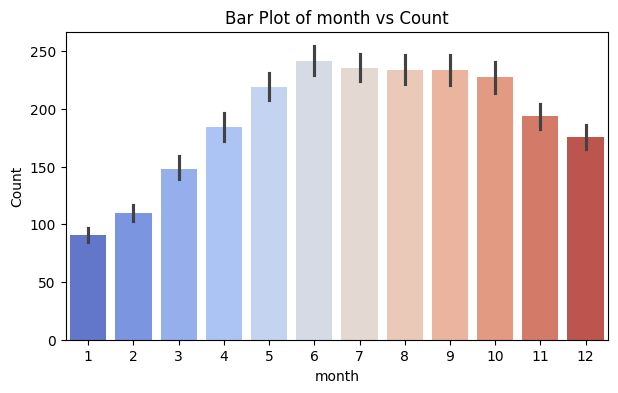

/var/folders/q8/m_0pc5fs2b14x2jrrp5dwh500000gn/T/ipykernel_956/3874540687.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day', y='count', data=df, palette='coolwarm')


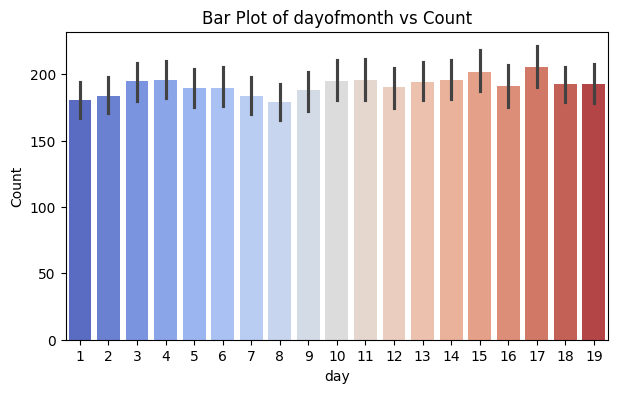

/var/folders/q8/m_0pc5fs2b14x2jrrp5dwh500000gn/T/ipykernel_956/3874540687.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dayofweek', y='count', data=df, palette='coolwarm')


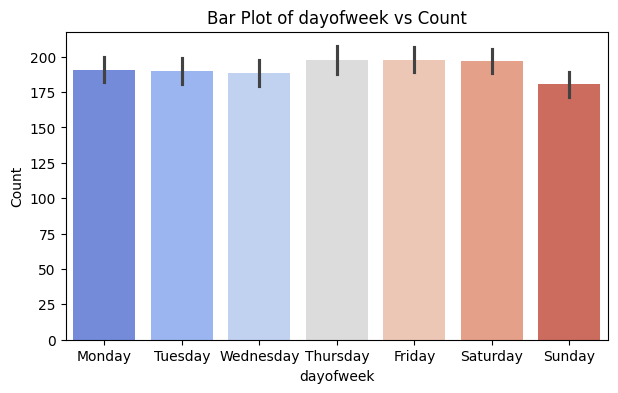

/var/folders/q8/m_0pc5fs2b14x2jrrp5dwh500000gn/T/ipykernel_956/3874540687.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hour', y='count', data=df, palette='coolwarm')


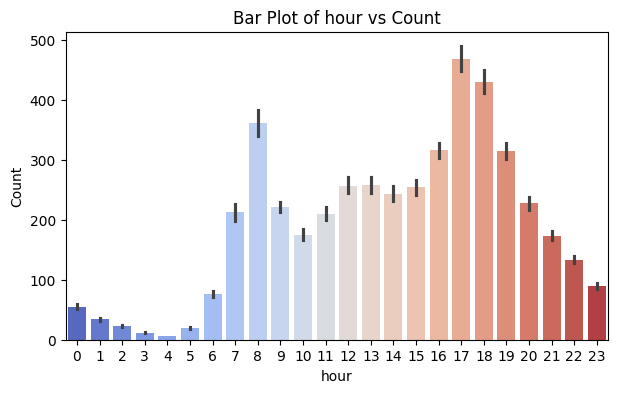

In [142]:

plt.figure(figsize=(7, 4))
sns.barplot(x='season', y='count', data=df, palette='pastel')
plt.title('Bar Plot of Season vs Count')
plt.xlabel('Season')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()


plt.figure(figsize=(7, 4))
sns.barplot(x='weather', y='count', data=df, palette='coolwarm')
plt.title('Bar Plot of Weather vs Count')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3], ['Clear', 'Mist', 'Light Rain/Snow', 'Heavy Rain/Snow'])
plt.show()

plt.figure(figsize=(7, 4))
sns.barplot(x='holiday', y='count', data=df, palette='coolwarm')
plt.title('Bar Plot of Holiday vs Count')
plt.xlabel('Holiday')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

plt.figure(figsize=(7, 4))
sns.barplot(x='workingday', y='count', data=df, palette='coolwarm')
plt.title('Bar Plot of workingday vs Count')
plt.xlabel('workingday')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

plt.figure(figsize=(7, 4))
sns.barplot(x='year', y='count', data=df, palette='coolwarm')
plt.title('Bar Plot of year vs Count')
plt.xlabel('year')
plt.ylabel('Count')
plt.xticks([0, 1], ['2011', '2012'])
plt.show()

plt.figure(figsize=(7, 4))
sns.barplot(x='month', y='count', data=df, palette='coolwarm')
plt.title('Bar Plot of month vs Count')
plt.xlabel('month')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(7, 4))
sns.barplot(x='day', y='count', data=df, palette='coolwarm')
plt.title('Bar Plot of dayofmonth vs Count')
plt.xlabel('day')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(7, 4))
sns.barplot(x='dayofweek', y='count', data=df, palette='coolwarm')
plt.title('Bar Plot of dayofweek vs Count')
plt.xlabel('dayofweek')
plt.ylabel('Count')
plt.xticks([0, 1 , 2 ,3 , 4 , 5 , 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

plt.figure(figsize=(7, 4))
sns.barplot(x='hour', y='count', data=df, palette='coolwarm')
plt.title('Bar Plot of hour vs Count')
plt.xlabel('hour')
plt.ylabel('Count')
plt.show()








* Analyze relationship ( Numerical features --> Scatter plot )

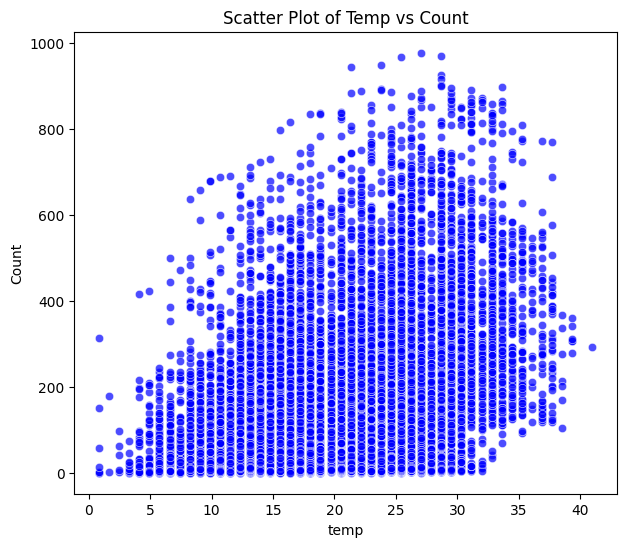

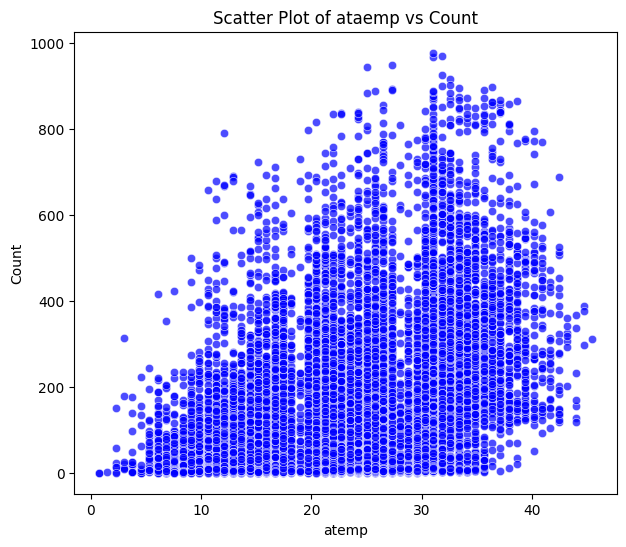

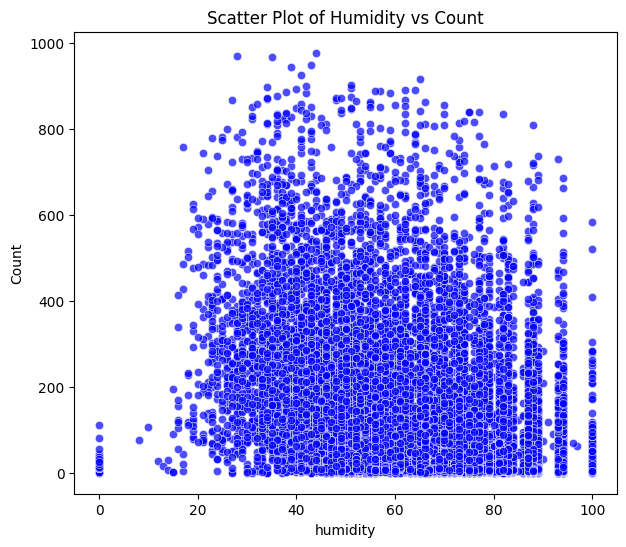

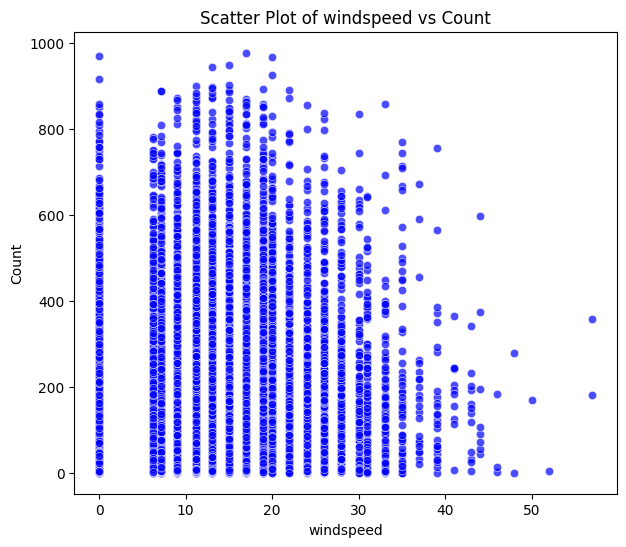

In [143]:

plt.figure(figsize=(7, 6))
sns.scatterplot(x=df['temp'], y=df['count'], alpha=0.7, color='blue')
plt.title(f'Scatter Plot of Temp vs Count')
plt.xlabel('temp')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(7, 6))
sns.scatterplot(x=df['atemp'], y=df['count'], alpha=0.7, color='blue')
plt.title(f'Scatter Plot of ataemp vs Count')
plt.xlabel('atemp')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(7, 6))
sns.scatterplot(x=df['humidity'], y=df['count'], alpha=0.7, color='blue')
plt.title(f'Scatter Plot of Humidity vs Count')
plt.xlabel('humidity')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(7, 6))
sns.scatterplot(x=df['windspeed'], y=df['count'], alpha=0.7, color='blue')
plt.title(f'Scatter Plot of windspeed vs Count')
plt.xlabel('windspeed')
plt.ylabel('Count')
plt.show()

* Create a correlation heatmap to identify features strongly correlated with
the target variable. 

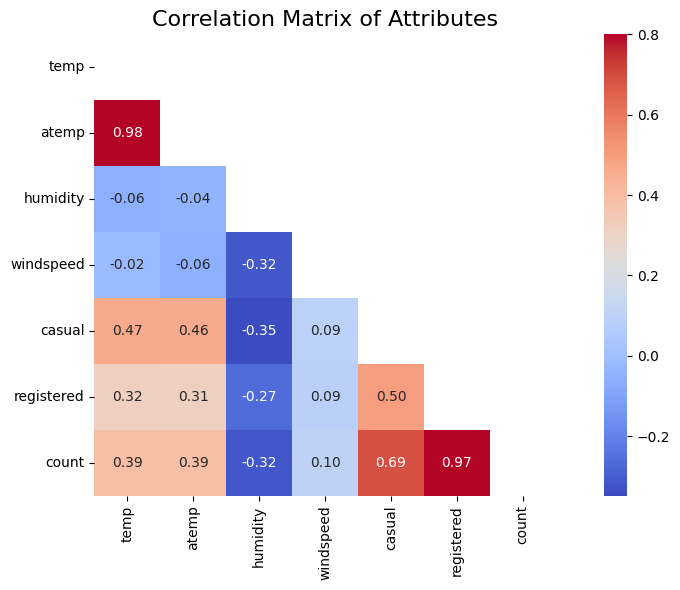

In [144]:
correMtr = df[["temp", "atemp", "humidity", "windspeed", "casual", "registered", "count"]].corr()

mask = np.triu(np.ones_like(correMtr, dtype=bool))
fig, ax = plt.subplots(figsize=(10, 6)) 
sns.heatmap(correMtr, mask=mask, vmax=0.8, square=True, annot=True, fmt=".2f", cmap="coolwarm", ax=ax)
ax.set_title('Correlation Matrix of Attributes', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


* Build and Evaluate a Linear Regression Model:
1. Train-Test Split:

In [145]:
np.random.seed(2)
n = len(df)
n_train = int(n * 0.8)
n_test = n - (n_train )

index = np.arange(n)
np.random.shuffle(index)
df_shuffled = df.iloc[index]

df_train = df_shuffled[:n_train].copy()
df_test = df_shuffled[n_train:].copy()

y_train = np.log1p(df_train['count'].values)
y_test = np.log1p(df_test['count'].values)

In [146]:
columns_to_drop = ['count', 'datetime', 'temp', 'casual', 'registered', 'season', 'weather']
X_train = df_train.drop(columns=columns_to_drop).values
X_test = df_test.drop(columns=columns_to_drop).values



* Train the Model:
○ Train a Linear Regression model on the training data.

In [147]:

def train_ridge_regression(X, y, alpha):
    model = Ridge(alpha=alpha)
    model.fit(X, y)
    return model

model = train_ridge_regression(X_train, y_train, alpha=0.1) 


* Evaluate the Model:

In [148]:
def calculate_rmse(model, X, y):
    y_pred = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    return rmse

In [149]:
rmse_train = calculate_rmse(model, X_train, y_train)
rmse_test = calculate_rmse(model, X_test, y_test)

print(f'RMSE Train: {rmse_train}')
print(f'RMSE Test: {rmse_test}')


RMSE Train: 0.5730356991641206
RMSE Test: 0.5958814367571729


In [150]:
def calculate_r2(model, X, y):
    r2 = model.score(X, y)
    return r2

In [151]:
r2_train = calculate_r2(model, X_train, y_train)
r2_test = calculate_r2(model, X_test, y_test)

In [152]:
print(f'R^2 Train: {r2_train}')
print(f'R^2 Test: {r2_test}')

R^2 Train: 0.8387925245634003
R^2 Test: 0.8154147245003046


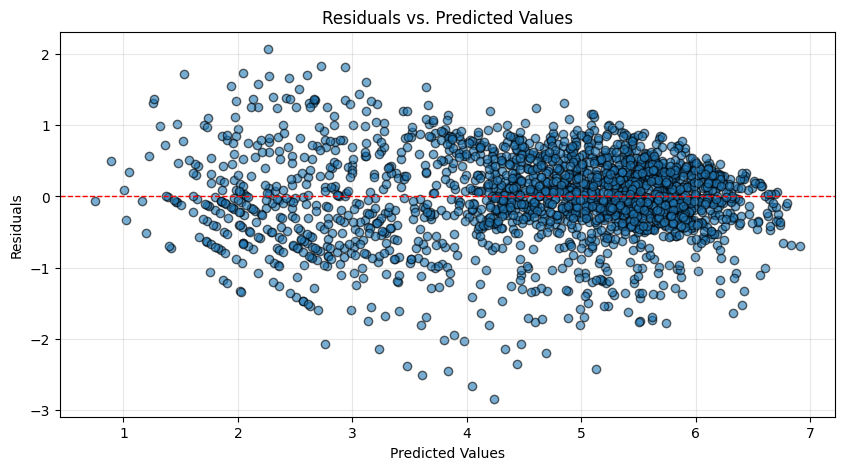

In [153]:
y_pred_test = model.predict(X_test)
residuals_test = y_test - y_pred_test


plt.figure(figsize=(10, 5))
plt.scatter(y_pred_test, residuals_test, alpha=0.6, edgecolor='k')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(alpha=0.3)
plt.show()

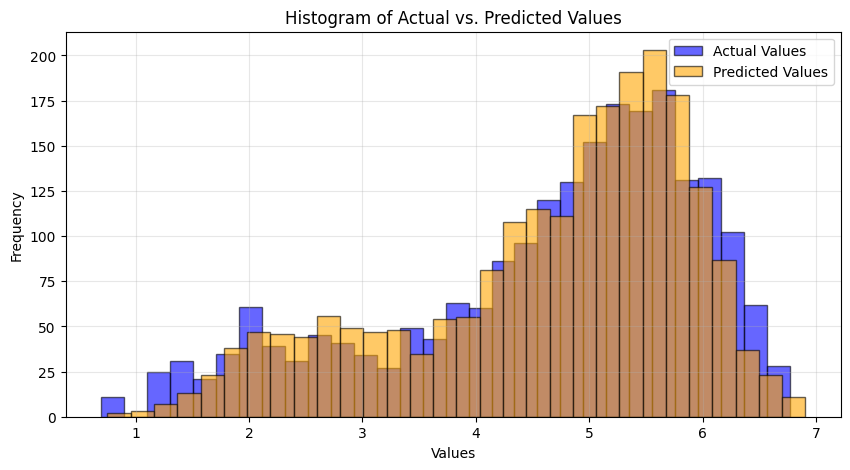

In [154]:
plt.figure(figsize=(10, 5))
plt.hist(y_test, bins=30, alpha=0.6, label='Actual Values', color='blue', edgecolor='black')
plt.hist(y_pred_test, bins=30, alpha=0.6, label='Predicted Values', color='orange', edgecolor='black')
plt.title('Histogram of Actual vs. Predicted Values')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(alpha=0.3)
plt.show()


* The model performs well for medium bike-sharing counts between 3 and 6, with predictions closely aligned to actual values. However, it underperforms at the extremes, underpredicting low counts and failing to capture high peaks, likely due to limited feature representation

* Key findings from the EDA :
--> From correlation heatmap, we can observed that some features are positively correlated or some are negatively correlated to each other. The temp and atemp are highly positively correlated to each other, it means that both are carrying same information so we need to drop one of them .The count,casual and registered are highly positively correlated to each other. So, we are going to ignore temp,casual and registered variable for further analysis.
--> Fall(autumn) season has the highest count of bikes rental , Clear weather(1) has  highest count of bikes rental , 2012 year has bike rentals more than 2011 year , Summer months have the highest bike rentals espcially JUNE month . 8 AM , 5 PM have the highest number of rentals because in this time people go/leave their work/school/university .

* How feature engineering impacted the model:
-->
* Model performance and challenges encountered during the process.

